# Initial Data Cleaning and Pre-processing

In [28]:
import pandas as pd

In [29]:
#Importing the csv file

df = pd.read_csv('grenada_rooftop_solar_potential.csv')
df.head()

,uuid,City,Surface_area,Potential_installable_area,Peak_installable_capacity,Energy_potential_per_year,Assumed_building_type,Estimated_tilt,Estimated_building_height,Estimated_capacity_factor,Unit_installation_price,Comment
0,c764c058-7175-4ef4-b981-2337d424d7bf,Grenada,50.07,25.84,5.01,6416.43,Single-family residential,13.94,13.60,1279.75,9.707844427,NaN
1,00978f18-5dea-4892-9c6c-2dccc1c96152,Grenada,20.51,9.28,1.80,2223.33,Single-family residential,30.28,144.52,1234.50,3.978232759,NaN
2,5f02ff57-d539-44e6-84b2-67fd3c16f567,Grenada,45.63,24.67,4.78,6211.60,Single-family residential,18.51,16.48,1299.11,8.841159303,NaN
3,75fb9627-212b-423d-94a7-658def689b81,Grenada,31.33,14.36,2.79,3704.81,Single-family residential,15.52,7.55,1330.00,6.0870961,NaN
4,0f9a8975-956c-4b0f-b8e3-704f25c719af,Grenada,28.76,14.27,2.77,3719.90,Single-family residential,15.51,15.97,1342.55,5.582704975,NaN


In [30]:
print(df.shape)

(51115, 12)


In [31]:
df['no_of_panels'] = round(df['Potential_installable_area']/15)

In [74]:
df['Estimated_capacity_factor_%'] = df['Estimated_capacity_factor']/100

In [75]:
df.head()

,uuid,City,Surface_area,Potential_installable_area,Peak_installable_capacity,Energy_potential_per_year,Assumed_building_type,Estimated_tilt,Estimated_building_height,Estimated_capacity_factor,Unit_installation_price,Comment,no_of_panels,Estimated_capacity_factor_%
0,c764c058-7175-4ef4-b981-2337d424d7bf,Grenada,50.07,25.84,5.01,6416.43,Single-family residential,13.94,13.60,1279.75,9.707844427,NaN,2.0,12.7975
1,00978f18-5dea-4892-9c6c-2dccc1c96152,Grenada,20.51,9.28,1.80,2223.33,Single-family residential,30.28,144.52,1234.50,3.978232759,NaN,1.0,12.3450
2,5f02ff57-d539-44e6-84b2-67fd3c16f567,Grenada,45.63,24.67,4.78,6211.60,Single-family residential,18.51,16.48,1299.11,8.841159303,NaN,2.0,12.9911
3,75fb9627-212b-423d-94a7-658def689b81,Grenada,31.33,14.36,2.79,3704.81,Single-family residential,15.52,7.55,1330.00,6.0870961,NaN,1.0,13.3000
4,0f9a8975-956c-4b0f-b8e3-704f25c719af,Grenada,28.76,14.27,2.77,3719.90,Single-family residential,15.51,15.97,1342.55,5.582704975,NaN,1.0,13.4255


In [76]:
sample = df.sample(frac=0.1)

In [77]:
print(sample.shape)

(5112, 14)


**Before performing EDA, we see that our dataset has 51115 rows of data and 12 columns/features**

# Detecting and handling missing values

In [78]:
# understanding the information about the dataset
sample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5112 entries, 2288 to 33032
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   uuid                         5112 non-null   object 
 1   City                         5112 non-null   object 
 2   Surface_area                 5112 non-null   float64
 3   Potential_installable_area   5112 non-null   float64
 4   Peak_installable_capacity    5112 non-null   float64
 5   Energy_potential_per_year    5112 non-null   float64
 6   Assumed_building_type        5112 non-null   object 
 7   Estimated_tilt               5112 non-null   float64
 8   Estimated_building_height    4967 non-null   float64
 9   Estimated_capacity_factor    5059 non-null   float64
 10  Unit_installation_price      5112 non-null   object 
 11  Comment                      0 non-null      float64
 12  no_of_panels                 5112 non-null   float64
 13  Estimated_capacity_

In [79]:
#SInce Comment column is not necessary in our data analysis, we are dropping the column
sample = sample.drop(["Comment"], axis = 1)

In [80]:
sample.head()

,uuid,City,Surface_area,Potential_installable_area,Peak_installable_capacity,Energy_potential_per_year,Assumed_building_type,Estimated_tilt,Estimated_building_height,Estimated_capacity_factor,Unit_installation_price,no_of_panels,Estimated_capacity_factor_%
2288,807b853b-d673-410d-a358-aa07e4c979d7,Grenada,169.80,100.21,19.44,28346.28,Single-family residential,13.96,0.00,1458.03,32.93994611,7.0,14.5803
15654,76a72a1e-76be-431b-bf2a-bee19935c16d,Grenada,52.11,18.41,3.57,4602.77,Single-family residential,20.54,178.65,1289.03,10.10498099,1.0,12.8903
4328,9de430b1-008c-4bd7-b2fe-e28e65146684,Grenada,64.23,35.19,6.82,9041.54,Single-family residential,15.77,4.61,1325.89,12.44809889,2.0,13.2589
48427,5da652bf-a8eb-46d7-b6db-ab613505a6c7,Grenada,178.88,100.98,19.61,29897.39,Single-family residential,16.53,6.89,1524.55,34.73793622,7.0,15.2455
12070,2d84abcc-f8b4-4266-a908-6151ba57c115,Grenada,125.49,77.95,15.11,23555.94,Single-family residential,19.84,3.99,1559.35,24.3252585,5.0,15.5935


In [81]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5112 entries, 2288 to 33032
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   uuid                         5112 non-null   object 
 1   City                         5112 non-null   object 
 2   Surface_area                 5112 non-null   float64
 3   Potential_installable_area   5112 non-null   float64
 4   Peak_installable_capacity    5112 non-null   float64
 5   Energy_potential_per_year    5112 non-null   float64
 6   Assumed_building_type        5112 non-null   object 
 7   Estimated_tilt               5112 non-null   float64
 8   Estimated_building_height    4967 non-null   float64
 9   Estimated_capacity_factor    5059 non-null   float64
 10  Unit_installation_price      5112 non-null   object 
 11  no_of_panels                 5112 non-null   float64
 12  Estimated_capacity_factor_%  5059 non-null   float64
dtypes: float64(9), obje

In [82]:
#Changing the data type of the column 'Unit_installation_price' from object to float
sample['Unit_installation_price'] = pd.to_numeric(sample['Unit_installation_price'], errors='coerce')

In [83]:
# checking if there are any missing values in our dataset or not
sample.isnull().sum()

uuid                             0
City                             0
Surface_area                     0
Potential_installable_area       0
Peak_installable_capacity        0
Energy_potential_per_year        0
Assumed_building_type            0
Estimated_tilt                   0
Estimated_building_height      145
Estimated_capacity_factor       53
Unit_installation_price         53
no_of_panels                     0
Estimated_capacity_factor_%     53
dtype: int64

**From the above output, we see that there are 1473 missing values for Estimated_building_height, 639 missing values for both Estimated_capacity_factor and Unit_installation_price.**

In [84]:
#Dropping all the rows which have missing values because the columns Estimated_building_height, 
#Estimated_capacity_factor and Unit_installation_price cannot be filled with any arbitrary values.
sample = sample.dropna(axis = 0, how ='any')

#Rechecking our data for missing values or null values count
print(sample.isnull().sum())

#Checking the number of rows and columns
sample.shape

uuid                           0
City                           0
Surface_area                   0
Potential_installable_area     0
Peak_installable_capacity      0
Energy_potential_per_year      0
Assumed_building_type          0
Estimated_tilt                 0
Estimated_building_height      0
Estimated_capacity_factor      0
Unit_installation_price        0
no_of_panels                   0
Estimated_capacity_factor_%    0
dtype: int64


(4915, 13)

# Detecting and handling Outliers

In [85]:
#After handling missing values, we are now checking for Outliers in our dataset using the Z-score statistical test
from scipy.stats import zscore

In [86]:
# Select the columns containing numeric data for outlier detection
numeric_cols = ['Surface_area', 'Potential_installable_area', 'Peak_installable_capacity', 'Energy_potential_per_year',
                'Estimated_tilt', 'Estimated_building_height', 'Estimated_capacity_factor', 'Unit_installation_price', 'no_of_panels']

# Calculate z-scores for the selected columns
z_scores = zscore(sample[numeric_cols])

# Create a DataFrame with z-scores
z_scores_df = pd.DataFrame(z_scores, columns=numeric_cols)

# Define a threshold for identifying outliers (commonly z-score threshold of 2 or -2 is used)
threshold = 3

# Create a mask for outliers based on the threshold
outlier_mask = (z_scores_df > threshold) | (z_scores_df < -threshold)

In [87]:
# Extract rows with outliers and create a dataframe with the outliers datarows
outliers = sample[outlier_mask.any(axis=1)]
outliers

,uuid,City,Surface_area,Potential_installable_area,Peak_installable_capacity,Energy_potential_per_year,Assumed_building_type,Estimated_tilt,Estimated_building_height,Estimated_capacity_factor,Unit_installation_price,no_of_panels,Estimated_capacity_factor_%
15654,76a72a1e-76be-431b-bf2a-bee19935c16d,Grenada,52.11,18.41,3.57,4602.77,Single-family residential,20.54,178.65,1289.03,10.104981,1.0,12.8903
5260,2b8ca671-1609-487a-b68e-66d6fa8961a1,Grenada,90.95,54.11,10.50,11451.59,Single-family residential,30.33,30.14,1091.00,17.648771,4.0,10.9100
36226,340239b3-5f98-4db9-8c4f-bbe43b6afcb2,Grenada,707.58,491.02,95.35,152564.44,Commercial,13.60,8.01,1600.00,137.403269,33.0,16.0000
31658,608d1de4-49de-4384-ae13-2d6f0fd7d70a,Grenada,4620.79,3678.63,713.65,1161116.20,Industrial,13.67,6.08,1627.00,896.427959,245.0,16.2700
41556,1f2fd2e1-9682-4954-b611-86f58524d3f2,Grenada,3688.78,2775.25,538.40,875974.10,Commercial,8.54,4.10,1627.00,715.625314,185.0,16.2700
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15518,2a5f5485-28a1-44b1-a4cd-2acdec70c72e,Grenada,58.10,28.37,5.50,6109.61,Single-family residential,33.57,3.76,1110.02,11.263659,2.0,11.1002
35266,331bdb40-99ab-487e-b220-73a2b949e0be,Grenada,1083.25,833.00,161.60,258561.89,Commercial,11.71,4.84,1600.00,210.147899,56.0,16.0000
15144,7f0a4b2a-db60-4554-b2bf-3d371e315f65,Grenada,175.75,90.15,17.51,20890.69,Single-family residential,34.44,44.75,1193.24,34.136245,6.0,11.9324
41924,60a1a30c-72ad-4b9c-9ceb-d6351d97aeb5,Grenada,1546.50,1130.36,219.51,357141.38,Industrial,17.10,6.74,1627.00,300.322211,75.0,16.2700


**Since, all the outliers identified in the above step are other outliers and not true outliers, we can remove all the identified outlier rows from the dataframe.**

In [88]:
#Extract rows with outliers and create a dataframe with the outliers datarows
df1 = sample[~outlier_mask.any(axis=1)]
df1

,uuid,City,Surface_area,Potential_installable_area,Peak_installable_capacity,Energy_potential_per_year,Assumed_building_type,Estimated_tilt,Estimated_building_height,Estimated_capacity_factor,Unit_installation_price,no_of_panels,Estimated_capacity_factor_%
2288,807b853b-d673-410d-a358-aa07e4c979d7,Grenada,169.80,100.21,19.44,28346.28,Single-family residential,13.96,0.00,1458.03,32.939946,7.0,14.5803
4328,9de430b1-008c-4bd7-b2fe-e28e65146684,Grenada,64.23,35.19,6.82,9041.54,Single-family residential,15.77,4.61,1325.89,12.448099,2.0,13.2589
48427,5da652bf-a8eb-46d7-b6db-ab613505a6c7,Grenada,178.88,100.98,19.61,29897.39,Single-family residential,16.53,6.89,1524.55,34.737936,7.0,15.2455
12070,2d84abcc-f8b4-4266-a908-6151ba57c115,Grenada,125.49,77.95,15.11,23555.94,Single-family residential,19.84,3.99,1559.35,24.325259,5.0,15.5935
4470,56cb1ca0-ca25-42e8-84ed-c4870cf41dde,Grenada,98.00,58.43,11.34,16623.53,Single-family residential,18.96,9.78,1466.46,19.019682,4.0,14.6646
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6512,aa7be95b-96d4-47fe-b245-d486a59edfbd,Grenada,37.18,17.95,3.48,5041.51,Single-family residential,15.78,5.29,1447.83,7.208156,1.0,14.4783
19604,2c184396-652d-4a00-b1b8-a86b4198845f,Grenada,30.59,15.09,2.93,4265.02,Single-family residential,18.42,10.26,1457.30,5.939609,1.0,14.5730
44309,676c2894-8fd0-4f12-b42a-e24b6e6cedf0,Grenada,309.32,192.24,37.29,60117.88,Schools,9.56,10.06,1612.00,60.000743,13.0,16.1200
13103,1fd6e252-de33-40e0-9793-2fcd4c7a4867,Grenada,19.68,6.32,1.23,1693.83,Single-family residential,16.27,0.22,1380.68,3.830127,0.0,13.8068


**After handling missing values and outliers, we now have a dataset of 47835 rows of data and 11 columns/features**

In [89]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4803 entries, 2288 to 6052
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   uuid                         4803 non-null   object 
 1   City                         4803 non-null   object 
 2   Surface_area                 4803 non-null   float64
 3   Potential_installable_area   4803 non-null   float64
 4   Peak_installable_capacity    4803 non-null   float64
 5   Energy_potential_per_year    4803 non-null   float64
 6   Assumed_building_type        4803 non-null   object 
 7   Estimated_tilt               4803 non-null   float64
 8   Estimated_building_height    4803 non-null   float64
 9   Estimated_capacity_factor    4803 non-null   float64
 10  Unit_installation_price      4803 non-null   float64
 11  no_of_panels                 4803 non-null   float64
 12  Estimated_capacity_factor_%  4803 non-null   float64
dtypes: float64(10), obje

In [90]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder to handle categorical data
le = LabelEncoder()

# Encode the 'Assumed_building_type' column
df1['Assumed_building_type_encoded'] = le.fit_transform(df1['Assumed_building_type'])

C:\Users\anual\AppData\Local\Temp\ipykernel_4536\4189179540.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Assumed_building_type_encoded'] = le.fit_transform(df1['Assumed_building_type'])


In [91]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4803 entries, 2288 to 6052
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   uuid                           4803 non-null   object 
 1   City                           4803 non-null   object 
 2   Surface_area                   4803 non-null   float64
 3   Potential_installable_area     4803 non-null   float64
 4   Peak_installable_capacity      4803 non-null   float64
 5   Energy_potential_per_year      4803 non-null   float64
 6   Assumed_building_type          4803 non-null   object 
 7   Estimated_tilt                 4803 non-null   float64
 8   Estimated_building_height      4803 non-null   float64
 9   Estimated_capacity_factor      4803 non-null   float64
 10  Unit_installation_price        4803 non-null   float64
 11  no_of_panels                   4803 non-null   float64
 12  Estimated_capacity_factor_%    4803 non-null   flo

In [92]:
#df1 = df1.drop(["uuid","City","Assumed_building_type"],axis=1)

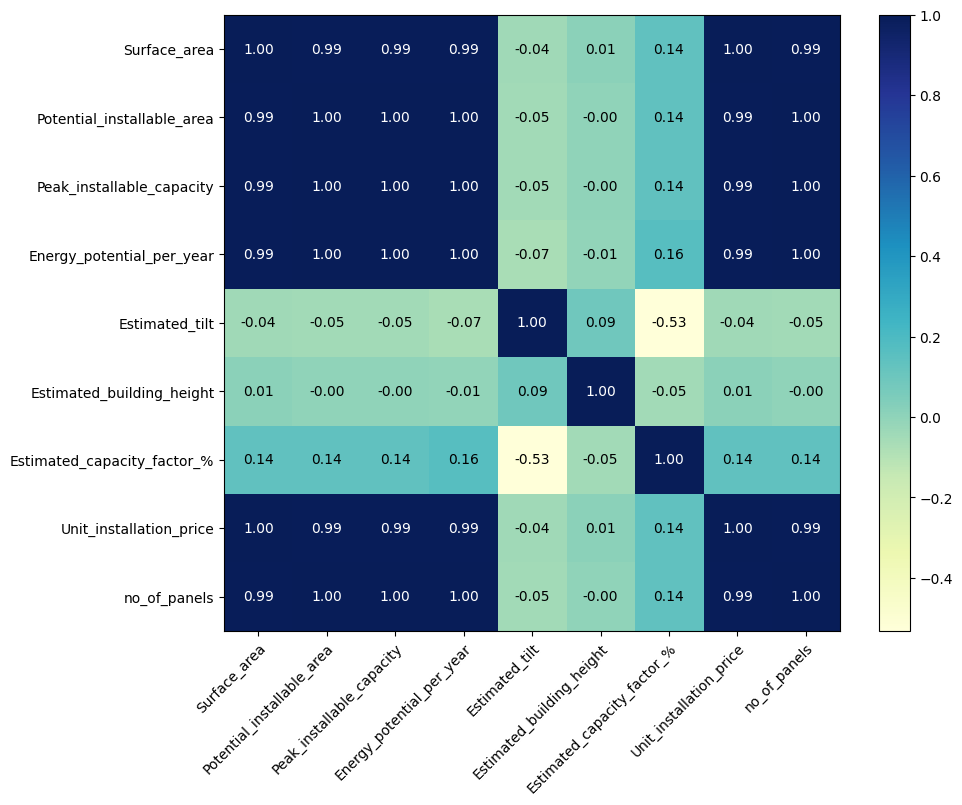

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns
import mlxtend
import numpy as np
from mlxtend.plotting import heatmap

#cols = df1.columns # List of colmuns of dataframe GateArrivalDelay df
cols = ['Surface_area', 'Potential_installable_area', 'Peak_installable_capacity', 'Energy_potential_per_year',
                'Estimated_tilt', 'Estimated_building_height', 'Estimated_capacity_factor_%', 'Unit_installation_price', 'no_of_panels']

cm = np.corrcoef(sample[cols].values.T) # Calculate Pearson correlation
hm = heatmap(cm, figsize=(10,8), row_names=cols, column_names=cols, cmap="YlGnBu") # ,!Represent correlation by a heat map
plt.show()

# Checking for multicollinearity - metrics used is VIF

In [94]:

# load statmodels functions
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# compute the vif for all given features
def compute_vif(considered_features):
    
    X = sample[considered_features]
    # the calculation of variance inflation requires a constant
    X['intercept'] = 1
    
    # create dataframe to store vif values
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif[vif['Variable']!='intercept']
    return vif

In [95]:
# features to consider removing
#considered_features = ['Surface_area', 'Potential_installable_area', 'Peak_installable_capacity', 'Unit_installation_price', 'no_of_panels']

considered_features = ['Surface_area', 'Potential_installable_area', 'Peak_installable_capacity',
                'Estimated_tilt', 'Estimated_building_height', 'Estimated_capacity_factor_%', 'Unit_installation_price', 'no_of_panels']
# compute vif 
compute_vif(considered_features).sort_values('VIF')


#high_vif_features = vif_all[vif_all > 5]
#print(f"Features with high VIF (> 5): {high_vif_features.index.tolist()}")

C:\Users\anual\AppData\Local\Temp\ipykernel_4536\167190455.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['intercept'] = 1


,Variable,VIF
4,Estimated_building_height,1.025257e+00
3,Estimated_tilt,1.420541e+00
5,Estimated_capacity_factor_%,1.425207e+00
7,no_of_panels,7.655732e+02
0,Surface_area,3.647807e+07
6,Unit_installation_price,3.648101e+07
2,Peak_installable_capacity,4.927725e+07
1,Potential_installable_area,4.928300e+07


# PCA

Here are some options you can consider to address multicollinearity:

Drop one or more of the highly correlated features. This is the simplest approach, but it may not be desirable if all the features are relevant to your analysis.

Combine the highly correlated features into a single feature. This can be done by using techniques like principal component analysis (PCA) or factor analysis.

Use a regularization technique like ridge regression or Lasso. These techniques can help to shrink the coefficients of the correlated features, reducing their impact on the model.

In [65]:
sample = sample.drop(["uuid","City","Assumed_building_type"],axis=1)

In [66]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load your data into a pandas DataFrame
#df = pd.read_csv("your_data.csv")

# Standardize the data (optional, but recommended)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(sample)

# Initialize the PCA model
pca = PCA(n_components=2)  # Set the desired number of components (2 in this example)

# Fit the model to the data
pca.fit(scaled_data)

# Get the principal components (PCs)
principal_components = pca.components_

# Get the explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Transform the data onto the principal components
reduced_data = pca.transform(scaled_data)

# Use the reduced data for further analysis (e.g., visualization, modeling)

# Optional: Project data back to original space
original_data = pca.inverse_transform(reduced_data)

print("Principal components:", principal_components)
print("Explained variance ratio:", explained_variance)
print("Reduced data:", reduced_data)


Principal components: [[ 0.40548038  0.40782457  0.40782572  0.40753149 -0.0359628   0.00536679
   0.07213955  0.4054809   0.40733285]
 [ 0.04856285  0.03029027  0.03028575 -0.00736672  0.70551556  0.16576967
  -0.68351287  0.04855258  0.03120372]]
Explained variance ratio: [0.66447266 0.17166256]
Reduced data: [[-1.71823945 -0.52821349]
 [-1.71412525  1.53688547]
 [ 5.03190895 -0.69478303]
 ...
 [-0.10474004  0.37541273]
 [-0.16609549  0.63694791]
 [-1.11888463 -0.43431861]]


# Visualization of PCA

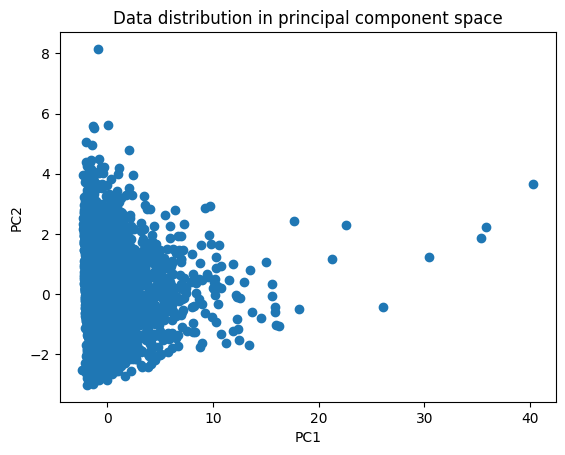

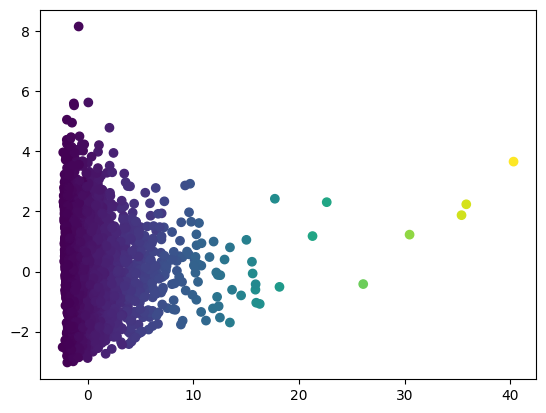

In [67]:
import matplotlib.pyplot as plt

# Plot data points on the first two principal components
plt.scatter(reduced_data[:, 0], reduced_data[:, 1])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Data distribution in principal component space")
plt.show()

# Optionally, color-code data points by a specific feature or cluster labels
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=sample["Energy_potential_per_year"])  # Replace "target_variable" with your actual feature

# Explore further visualizations based on your research question (e.g., 3D plots, animation)


# Interpreting the components

In [73]:
# Print the loadings for the first few components
#print("Loadings for the first two components:")
#print(pd.DataFrame(pca.components_.T[:2], columns=sample.columns))

print("Original data shape:", sample.shape)

print("Loadings for the first two components:")
print(pd.DataFrame(pca.components_, columns=sample.columns[:2]))


# Analyze the high loadings to understand what each component captures
# For example, if "feature1" and "feature2" have high loadings in PC1, it means they contribute most to explaining that component

# You can also calculate biplots to visualize the loadings and relationships between original features and components


Original data shape: (4881, 9)
Loadings for the first two components:


ValueError: Shape of passed values is (2, 9), indices imply (2, 2)

In [51]:
import pandas as pd
import statsmodels.stats.diagnostic

def calculate_vif(data, feature_idx):
  """
  Calculates the VIF (Variance Inflation Factor) for a specific feature.

  Args:
      data: pandas DataFrame containing the data.
      feature_idx: integer, index of the feature for which VIF is calculated.

  Returns:
      float, the VIF value for the specified feature.
  """
  model = LinearRegression()
  model.fit(data.drop(data.columns[feature_idx], axis=1), data.iloc[:, feature_idx])
  return 1 / (1 - model.score(data.drop(data.columns[feature_idx], axis=1), data.iloc[:, feature_idx]))

def calculate_vif_all(data):
  """
  Calculates VIF for all features in a DataFrame.

  Args:
      data: pandas DataFrame containing the data.

  Returns:
      pandas Series, containing VIF values for each feature.
  """
  vif_values = []
  for i in range(len(data.columns)):
    vif = calculate_vif(data, i)
    vif_values.append(vif)
  return pd.Series(vif_values, index=data.columns)

# Example usage

vif_all = calculate_vif_all(df1)
print(vif_all)

# Identify features with high VIF (> 5 or 10)
high_vif_features = vif_all[vif_all > 5]
print(f"Features with high VIF (> 5): {high_vif_features.index.tolist()}")



ValueError: could not convert string to float: 'Grenada'

# Lasso Regularization

In [121]:
# Import libraries
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

# Split data into training and validation sets
features_train, features_val, target_train, target_val = train_test_split(
    df1[['Potential_installable_area', 'Estimated_capacity_factor_%','Estimated_tilt']],  # Features excluding those with high VIF
    df1[ 'Energy_potential_per_year'],
    test_size=0.2,
    random_state=42,
)

# Define a range of alpha values for grid search
alpha_grid = {"alpha": [850]}

# Instantiate Lasso model and grid search
lasso = Lasso()
grid_search = GridSearchCV(lasso, param_grid=alpha_grid, scoring="r2")

# Fit grid search on training data
grid_search.fit(features_train, target_train)

# Get best model and alpha
best_model = grid_search.best_estimator_
best_alpha = grid_search.best_params_["alpha"]

# Print optimal alpha and train model with it
print(f"Optimal alpha: {best_alpha}")
lasso_model = Lasso(alpha=best_alpha)
lasso_model.fit(features_train, target_train)

# Analyze model coefficients
print(f"Coefficients: {lasso_model.coef_}")

# Evaluate model performance on validation set
predictions = lasso_model.predict(features_val)
r2 = r2_score(target_val, predictions)
print(f"R-squared on validation data: {r2}")

Optimal alpha: 850
Coefficients: [289.70474167  30.90609841 -66.4458676 ]
R-squared on validation data: 0.9929860066462415


# ELASTIC NET

In [122]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

# Split data into training and validation sets
features_train, features_val, target_train, target_val = train_test_split(
    sample[['Potential_installable_area', 'Estimated_capacity_factor_%', 'Estimated_tilt']],  # Features excluding those with high VIF
    sample['Energy_potential_per_year'],
    test_size=0.2,
    random_state=42,
)

# Define a range of alpha and l1_ratio values for grid search
param_grid = {"alpha": [850], "l1_ratio": np.linspace(0, 1, 10)}

# Instantiate Elastic Net model and grid search
elastic_net = ElasticNet()
grid_search = GridSearchCV(elastic_net, param_grid=param_grid, scoring="r2")

# Fit grid search on training data
grid_search.fit(features_train, target_train)

# Get best model and parameters
best_model = grid_search.best_estimator_
best_alpha = grid_search.best_params_["alpha"]
best_l1_ratio = grid_search.best_params_["l1_ratio"]

# Print optimal alpha and l1_ratio, and train model with it
print(f"Optimal alpha: {best_alpha}")
print(f"Optimal l1_ratio: {best_l1_ratio}")
elastic_net_model = ElasticNet(alpha=best_alpha, l1_ratio=best_l1_ratio)
elastic_net_model.fit(features_train, target_train)

# Analyze model coefficients
print(f"Coefficients: {elastic_net_model.coef_}")

# Evaluate model performance on validation set
predictions = elastic_net_model.predict(features_val)
r2 = r2_score(target_val, predictions)
print(f"R-squared on validation data: {r2}")


C:\Users\anual\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.235e+11, tolerance: 3.433e+08 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\anual\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.282e+11, tolerance: 4.637e+08 Linear regression models with null weight for the l1 regularization term are more efficiently 

Optimal alpha: 850
Optimal l1_ratio: 1.0
Coefficients: [307.08428454   7.39383908 -67.39525304]
R-squared on validation data: 0.9977036206517038


# Research Question 1 -

**How can we optimize solar rooftop installations in Grenada to maximize energy generation while considering building types and rooftop characteristics?**

Now that we have performed EDA, the next step will be feature generation. 

We could create a new feature called Normalized_energy_potential that divides the Energy_potential_per_year by the Surface_area to account for the size of the rooftop. This feature would allow you to compare the energy generation potential of different rooftops, regardless of their size.

In [124]:
sample.head()

,uuid,City,Surface_area,Potential_installable_area,Peak_installable_capacity,Energy_potential_per_year,Assumed_building_type,Estimated_tilt,Estimated_building_height,Estimated_capacity_factor,Unit_installation_price,no_of_panels,Estimated_capacity_factor_%
2288,807b853b-d673-410d-a358-aa07e4c979d7,Grenada,169.80,100.21,19.44,28346.28,Single-family residential,13.96,0.00,1458.03,32.939946,7.0,14.5803
15654,76a72a1e-76be-431b-bf2a-bee19935c16d,Grenada,52.11,18.41,3.57,4602.77,Single-family residential,20.54,178.65,1289.03,10.104981,1.0,12.8903
4328,9de430b1-008c-4bd7-b2fe-e28e65146684,Grenada,64.23,35.19,6.82,9041.54,Single-family residential,15.77,4.61,1325.89,12.448099,2.0,13.2589
48427,5da652bf-a8eb-46d7-b6db-ab613505a6c7,Grenada,178.88,100.98,19.61,29897.39,Single-family residential,16.53,6.89,1524.55,34.737936,7.0,15.2455
12070,2d84abcc-f8b4-4266-a908-6151ba57c115,Grenada,125.49,77.95,15.11,23555.94,Single-family residential,19.84,3.99,1559.35,24.325259,5.0,15.5935


In [166]:
print(sample['no_of_panels'].mean())
print(sample['Energy_potential_per_year'].mean())

4.362563580874873
18906.47746897253


**Linear Regression**

In [152]:
# Group by building type
grouped_by_building_type = sample.groupby('Assumed_building_type')

# Optimization for each building type
for building_type, group in grouped_by_building_type:
    print(building_type)
    # Selecting relevant features
    features = ['Potential_installable_area', 'Estimated_capacity_factor_%', 'Estimated_tilt']

    # Target variable
    target = 'Energy_potential_per_year'

    # Separate features and target variables
    X = group[features]
    y = group[target]

    # Feature scaling
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Model selection and training
    from sklearn.model_selection import train_test_split
    from sklearn.linear_model import LinearRegression
    from sklearn.metrics import mean_absolute_error


    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    # Train the model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Evaluate model performance
    from sklearn.metrics import mean_squared_error, r2_score
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print("LR")
    print(f"Building type: {building_type}")
    print(f"MSE: {mse:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"R2: {r2:.4f}")
    print("\n")

    
    # Optimization using the trained model
    # Define a function to calculate the expected energy generation
    def expected_energy_generation(potential_installable_area, estimated_capacity_factor_per, estimated_tilt):
        features_scaled = scaler.transform([[potential_installable_area, estimated_capacity_factor_per, estimated_tilt]])
        return model.predict(features_scaled)[0]
    
        # Define constraints (e.g., minimum surface area, maximum tilt angle)
    constraints = [
        # Minimum surface area: 10 square meters
        #{'type': 'ineq', 'fun': lambda x: x[0] - 20},
        # Maximum tilt angle: 45 degrees
        {'type': 'ineq', 'fun': lambda x: x[1] - np.radians(45)},
        # Minimum surface area: 10 square meters
        {'type': 'ineq', 'fun': lambda x: x[0] - 20},
    ]

    # Optimization algorithm (e.g., genetic algorithm, particle swarm optimization)
    from scipy.optimize import minimize

    # Define the objective function to maximize
    def objective_function(x):
        potential_installable_area, estimated_capacity_factor_per, estimated_tilt = x
        return expected_energy_generation(potential_installable_area, estimated_capacity_factor_per, estimated_tilt)

    # Initialize the optimization
    initial_guess = [100, 50, np.radians(45)]

    # Run the optimization
    optimization_result = minimize(objective_function, initial_guess, method='SLSQP', constraints=constraints)

    # Extract the optimal configuration
    optimal_capacity_factor = optimization_result.x[1]
    optimal_potential_area = optimization_result.x[0]
    optimal_tilt_angle = optimization_result.x[2]
    #optimal_building_height = optimization_result.x[1]
    #optimal_normalized_energy = optimization_result.x[2]

    # Calculate the expected energy generation with the optimal configuration
    optimal_energy_generation = expected_energy_generation(optimal_potential_area, optimal_capacity_factor, optimal_tilt_angle)

    # Print the results
    print(f"Building type: {building_type}")
    print(f"Optimal capacity factor: {optimal_capacity_factor:.2f} square feet")
    print(f"Optimal tilt angle: {np.degrees(optimal_tilt_angle):.2f} degrees")
    #print(f"Optimal building height: {optimal_building_height:.2f} meters")
    #print(f"Optimal Normalized energy: {optimal_normalized_energy:.2f}")
    print(f"Optimal potential area: {optimal_potential_area:.2f} square meters")
    print(f"Optimal energy generation: {optimal_energy_generation:.2f} kWh/year")



Commercial
LR
Building type: Commercial
MSE: 14924010.6984
MAE: 2462.7634
R2: 0.9936


Building type: Commercial
Optimal capacity factor: 123864035403208353189462016.00 square feet
Optimal tilt angle: -27820124023849674073318240542523392.00 degrees
Optimal potential area: 118283784944138170992164864.00 square meters
Optimal energy generation: -13324126151452325880597145848905728.00 kWh/year
Hotels
LR
Building type: Hotels
MSE: 603280.8469
MAE: 698.0507
R2: 0.9908




C:\Users\anual\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\anual\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\anual\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\anual\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\anual\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScal

C:\Users\anual\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\anual\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\anual\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\anual\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\anual\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScal

Building type: Hotels
Optimal capacity factor: 23190890998368422273744896.00 square feet
Optimal tilt angle: -14426992633089429567424095995297792.00 degrees
Optimal potential area: 100278350537350258259656704.00 square meters
Optimal energy generation: -8162885903411240306569788667199488.00 kWh/year
Industrial
LR
Building type: Industrial
MSE: 541376.5150
MAE: 574.8814
R2: 0.9999


Building type: Industrial
Optimal capacity factor: 125868601067011512438095872.00 square feet
Optimal tilt angle: -12938273905134651077469161494937600.00 degrees
Optimal potential area: 180417623178401425813143552.00 square meters
Optimal energy generation: -3560347780180391592236939365842944.00 kWh/year
Multi-family residential
LR
Building type: Multi-family residential
MSE: 10019787.3205
MAE: 2438.8452
R2: 0.9893




C:\Users\anual\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\anual\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\anual\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\anual\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\anual\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScal

Building type: Multi-family residential
Optimal capacity factor: 201650732528452478452105216.00 square feet
Optimal tilt angle: -46967634018491807106602023329464320.00 degrees
Optimal potential area: 171940321662166734989164544.00 square meters
Optimal energy generation: -32190058424663844801693260483395584.00 kWh/year
Public
LR
Building type: Public
MSE: 9201023.0301
MAE: 2120.2182
R2: 0.9857


Building type: Public
Optimal capacity factor: 1320335390245516937168683008.00 square feet
Optimal tilt angle: 104256174531389248122955842361229312.00 degrees
Optimal potential area: 824844285831502810039975936.00 square meters
Optimal energy generation: -260645202593902420662084355806461952.00 kWh/year
Public health facilities
LR
Building type: Public health facilities
MSE: 721834.8362
MAE: 604.3652
R2: 0.9946


Building type: Public health facilities
Optimal capacity factor: 12025560040637610655219712.00 square feet
Optimal tilt angle: 6667252679381675101008861153198080.00 degrees
Optimal pot

C:\Users\anual\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\anual\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\anual\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\anual\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\anual\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScal

LR
Building type: Schools
MSE: 6457284.4045
MAE: 2207.3284
R2: 0.9983


Building type: Schools
Optimal capacity factor: 0.79 square feet
Optimal tilt angle: -10986453546.83 degrees
Optimal potential area: 20.00 square meters
Optimal energy generation: -16647425777.64 kWh/year
Single-family residential
LR
Building type: Single-family residential
MSE: 798136.1584
MAE: 566.0493
R2: 0.9959




C:\Users\anual\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\anual\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\anual\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\anual\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\anual\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScal

Building type: Single-family residential
Optimal capacity factor: 464536240952922892926976.00 square feet
Optimal tilt angle: -1492808186867259274549137732796416.00 degrees
Optimal potential area: 523135451294342894845952.00 square meters
Optimal energy generation: -31839067094368657197806951333888.00 kWh/year


C:\Users\anual\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\anual\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\anual\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\anual\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\anual\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScal

**Random Forest**

In [183]:
# Group by building type
grouped_by_building_type = sample.groupby('Assumed_building_type')

# Optimization for each building type
for building_type, group in grouped_by_building_type:
    print(building_type)
    # Selecting relevant features
    features = ['Potential_installable_area', 'Estimated_capacity_factor_%', 'Estimated_tilt']

    # Target variable
    target = 'Energy_potential_per_year'

    # Separate features and target variables
    X = group[features]
    y = group[target]

    # Feature scaling
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Model selection and training
    from sklearn.model_selection import train_test_split
    from sklearn.linear_model import LinearRegression
    from sklearn.metrics import mean_absolute_error


    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    
    
    # Create and train the Random Forest Regressor model
    from sklearn.ensemble import RandomForestRegressor
    rf = RandomForestRegressor(n_estimators=100)
    rf.fit(X_train, y_train)

    # Make predictions
    y_pred = rf.predict(X_test)

    # Calculate mean squared error and R-squared as performance metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Print the metrics
    print("RFR")
    print(f"Building type: {building_type}")
    print("Mean Squared Error:", mse)
    print(f"MAE: {mae:.4f}")
    print("R-squared (R2):", r2)
    print("\n")
    
   
    
    # Optimization using the trained model
    # Define a function to calculate the expected energy generation
    def expected_energy_generation(potential_installable_area, estimated_capacity_factor_per, estimated_tilt):
        features_scaled = scaler.transform([[potential_installable_area, estimated_capacity_factor_per, estimated_tilt]])
        return rf.predict(features_scaled)[0]
    
        # Define constraints (e.g., minimum surface area, maximum tilt angle)
    constraints = [
        # Minimum surface area: 10 square meters
        #{'type': 'ineq', 'fun': lambda x: x[0] - 20},
        {'type': 'ineq', 'fun': lambda x: x[0] - 10},
        {'type': 'ineq', 'fun': lambda x: x[0] - 20},
        # Maximum tilt angle: 45 degrees
        {'type': 'ineq', 'fun': lambda x: x[1] - np.radians(14)},
        # Minimum surface area: 10 square meters
    ]

    # Optimization algorithm (e.g., genetic algorithm, particle swarm optimization)
    from scipy.optimize import minimize

    # Define the objective function to maximize
    def objective_function(x):
        potential_installable_area, estimated_capacity_factor_per, estimated_tilt = x
        return expected_energy_generation(potential_installable_area, estimated_capacity_factor_per, estimated_tilt)

    # Initialize the optimization
    initial_guess = [75, 25, np.radians(14)]

    # Run the optimization
    optimization_result = minimize(objective_function, initial_guess, method='SLSQP', constraints=constraints)

    # Extract the optimal configuration
    optimal_capacity_factor = optimization_result.x[1]
    optimal_potential_area = optimization_result.x[0]
    optimal_tilt_angle = optimization_result.x[2]
    #optimal_building_height = optimization_result.x[1]
    #optimal_normalized_energy = optimization_result.x[2]

    # Calculate the expected energy generation with the optimal configuration
    optimal_energy_generation = expected_energy_generation(optimal_potential_area, optimal_capacity_factor, optimal_tilt_angle)

    # Print the results
    print(f"Building type: {building_type}")
    print(f"Optimal capacity factor: {optimal_capacity_factor:.2f} square feet")
    print(f"Optimal tilt angle: {np.degrees(optimal_tilt_angle):.2f} degrees")
    #print(f"Optimal building height: {optimal_building_height:.2f} meters")
    #print(f"Optimal Normalized energy: {optimal_normalized_energy:.2f}")
    print(f"Optimal potential area: {optimal_potential_area:.2f} square meters")
    print(f"Optimal energy generation: {optimal_energy_generation:.2f} kWh/year")



Commercial
RFR
Building type: Commercial
Mean Squared Error: 19456300.76243175
MAE: 2343.1361
R-squared (R2): 0.9916077157041451


Building type: Commercial
Optimal capacity factor: 25.00 square feet
Optimal tilt angle: 14.00 degrees
Optimal potential area: 75.00 square meters
Optimal energy generation: 22867.56 kWh/year
Hotels


C:\Users\anual\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\anual\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\anual\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\anual\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\anual\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScal

RFR
Building type: Hotels
Mean Squared Error: 2415607.336357614
MAE: 1016.2843
R-squared (R2): 0.9630945717565461


Building type: Hotels
Optimal capacity factor: 25.00 square feet
Optimal tilt angle: 14.00 degrees
Optimal potential area: 75.00 square meters
Optimal energy generation: 21528.67 kWh/year
Industrial


C:\Users\anual\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\anual\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\anual\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\anual\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\anual\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScal

RFR
Building type: Industrial
Mean Squared Error: 824093503.5621476
MAE: 15537.2386
R-squared (R2): 0.7732528919712875


Building type: Industrial
Optimal capacity factor: 25.00 square feet
Optimal tilt angle: 14.00 degrees
Optimal potential area: 75.00 square meters
Optimal energy generation: 71490.76 kWh/year
Multi-family residential


C:\Users\anual\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\anual\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\anual\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\anual\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\anual\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScal

RFR
Building type: Multi-family residential
Mean Squared Error: 13724753.610914018
MAE: 2499.2763
R-squared (R2): 0.9853707753353735


Building type: Multi-family residential
Optimal capacity factor: 25.00 square feet
Optimal tilt angle: 14.00 degrees
Optimal potential area: 75.00 square meters
Optimal energy generation: 19807.44 kWh/year
Public


C:\Users\anual\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\anual\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\anual\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\anual\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\anual\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScal

RFR
Building type: Public
Mean Squared Error: 25900841.223558232
MAE: 3751.5540
R-squared (R2): 0.9597220084724393


Building type: Public
Optimal capacity factor: 25.00 square feet
Optimal tilt angle: 14.00 degrees
Optimal potential area: 75.00 square meters
Optimal energy generation: 22691.85 kWh/year
Public health facilities


C:\Users\anual\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\anual\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\anual\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\anual\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\anual\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScal

RFR
Building type: Public health facilities
Mean Squared Error: 951410306.0632885
MAE: 22182.6874
R-squared (R2): -6.1260878014523605


Building type: Public health facilities
Optimal capacity factor: 25.00 square feet
Optimal tilt angle: 14.00 degrees
Optimal potential area: 75.00 square meters
Optimal energy generation: 59444.07 kWh/year
Schools


C:\Users\anual\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\anual\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\anual\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\anual\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\anual\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScal

RFR
Building type: Schools
Mean Squared Error: 371587451.9512914
MAE: 8547.7263
R-squared (R2): 0.9029445107192462


Building type: Schools
Optimal capacity factor: 25.00 square feet
Optimal tilt angle: 14.00 degrees
Optimal potential area: 75.00 square meters
Optimal energy generation: 18823.92 kWh/year
Single-family residential


C:\Users\anual\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\anual\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\anual\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\anual\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\anual\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScal

RFR
Building type: Single-family residential
Mean Squared Error: 755749.5285218928
MAE: 160.0895
R-squared (R2): 0.9961550216482008


Building type: Single-family residential
Optimal capacity factor: 25.00 square feet
Optimal tilt angle: 14.00 degrees
Optimal potential area: 75.00 square meters
Optimal energy generation: 23038.63 kWh/year


C:\Users\anual\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\anual\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\anual\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\anual\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\anual\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScal

**XGBoost**

In [184]:
# Group by building type
grouped_by_building_type = sample.groupby('Assumed_building_type')

# Optimization for each building type
for building_type, group in grouped_by_building_type:
    print(building_type)
    # Selecting relevant features
    features = ['Potential_installable_area', 'Estimated_capacity_factor_%', 'Estimated_tilt']

    # Target variable
    target = 'Energy_potential_per_year'

    # Separate features and target variables
    X = group[features]
    y = group[target]

    # Feature scaling
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Model selection and training
    from sklearn.model_selection import train_test_split
    from sklearn.linear_model import LinearRegression
    from sklearn.metrics import mean_absolute_error


    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    
    
    from xgboost import XGBRegressor
    
    # Initialize the XGBoost Regressor
    xgb_regressor = XGBRegressor()

    # Train the regressor
    xgb_regressor.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = xgb_regressor.predict(X_test)

    # Evaluate the model using mean squared error
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    # Calculate R-squared (coefficient of determination)
    r2 = r2_score(y_test, y_pred)

    print("XGB")
    print(f"Building type: {building_type}")
    print(f'Mean Squared Error: {mse}')
    print(f"MAE: {mae:.4f}")
    print("R-squared (R2):", r2)
    print("\n")
    
    # Optimization using the trained model
    # Define a function to calculate the expected energy generation
    def expected_energy_generation(potential_installable_area, estimated_capacity_factor_per, estimated_tilt):
        features_scaled = scaler.transform([[potential_installable_area, estimated_capacity_factor_per, estimated_tilt]])
        return xgb_regressor.predict(features_scaled)[0]
    
        # Define constraints (e.g., minimum surface area, maximum tilt angle)
    constraints = [
        # Minimum surface area: 10 square meters
        #{'type': 'ineq', 'fun': lambda x: x[0] - 20},
        {'type': 'ineq', 'fun': lambda x: x[0] - 10},
        {'type': 'ineq', 'fun': lambda x: x[0] - 20},
        # Maximum tilt angle: 45 degrees
        {'type': 'ineq', 'fun': lambda x: x[1] - np.radians(14)},
        # Minimum surface area: 10 square meters
    ]

    # Optimization algorithm (e.g., genetic algorithm, particle swarm optimization)
    from scipy.optimize import minimize

    # Define the objective function to maximize
    def objective_function(x):
        potential_installable_area, estimated_capacity_factor_per, estimated_tilt = x
        return expected_energy_generation(potential_installable_area, estimated_capacity_factor_per, estimated_tilt)

    # Initialize the optimization
        initial_guess = [75, 21, np.radians(14)]

    # Run the optimization
    optimization_result = minimize(objective_function, initial_guess, method='SLSQP', constraints=constraints)

    # Extract the optimal configuration
    optimal_capacity_factor = optimization_result.x[1]
    optimal_potential_area = optimization_result.x[0]
    optimal_tilt_angle = optimization_result.x[2]
    #optimal_building_height = optimization_result.x[1]
    #optimal_normalized_energy = optimization_result.x[2]

    # Calculate the expected energy generation with the optimal configuration
    optimal_energy_generation = expected_energy_generation(optimal_potential_area, optimal_capacity_factor, optimal_tilt_angle)

    # Print the results
    print(f"Building type: {building_type}")
    print(f"Optimal capacity factor: {optimal_capacity_factor:.2f} square feet")
    print(f"Optimal tilt angle: {np.degrees(optimal_tilt_angle):.2f} degrees")
    #print(f"Optimal building height: {optimal_building_height:.2f} meters")
    #print(f"Optimal Normalized energy: {optimal_normalized_energy:.2f}")
    print(f"Optimal potential area: {optimal_potential_area:.2f} square meters")
    print(f"Optimal energy generation: {optimal_energy_generation:.2f} kWh/year")



Commercial
XGB
Building type: Commercial
Mean Squared Error: 7200123.662332907
MAE: 1537.0063
R-squared (R2): 0.9968942973550098


Building type: Commercial
Optimal capacity factor: 25.00 square feet
Optimal tilt angle: 14.00 degrees
Optimal potential area: 75.00 square meters
Optimal energy generation: 23747.84 kWh/year
Hotels


C:\Users\anual\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\anual\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\anual\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\anual\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\anual\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScal

XGB
Building type: Hotels
Mean Squared Error: 833850.6475429471
MAE: 603.8786
R-squared (R2): 0.987260505970703


Building type: Hotels
Optimal capacity factor: 25.00 square feet
Optimal tilt angle: 14.00 degrees
Optimal potential area: 75.00 square meters
Optimal energy generation: 21649.99 kWh/year
Industrial
XGB
Building type: Industrial
Mean Squared Error: 625812140.6271695
MAE: 10458.6613
R-squared (R2): 0.8278094749647941


Building type: Industrial
Optimal capacity factor: 25.00 square feet
Optimal tilt angle: 14.00 degrees
Optimal potential area: 75.00 square meters
Optimal energy generation: 19278.37 kWh/year
Multi-family residential


C:\Users\anual\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\anual\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\anual\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\anual\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\anual\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScal

XGB
Building type: Multi-family residential
Mean Squared Error: 19579291.654282976
MAE: 3169.8815
R-squared (R2): 0.9791304190585264


Building type: Multi-family residential
Optimal capacity factor: 25.00 square feet
Optimal tilt angle: 14.00 degrees
Optimal potential area: 75.00 square meters
Optimal energy generation: 19848.79 kWh/year
Public
XGB
Building type: Public
Mean Squared Error: 36762768.85564158
MAE: 3976.8932
R-squared (R2): 0.9428307953507549


Building type: Public
Optimal capacity factor: 25.00 square feet
Optimal tilt angle: 14.00 degrees
Optimal potential area: 75.00 square meters
Optimal energy generation: 18493.71 kWh/year
Public health facilities


C:\Users\anual\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\anual\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\anual\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\anual\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\anual\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScal

XGB
Building type: Public health facilities
Mean Squared Error: 7931610.704648705
MAE: 2253.7143
R-squared (R2): 0.9405920306643112


Building type: Public health facilities
Optimal capacity factor: 25.00 square feet
Optimal tilt angle: 14.00 degrees
Optimal potential area: 75.00 square meters
Optimal energy generation: 16894.47 kWh/year
Schools
XGB
Building type: Schools
Mean Squared Error: 637237602.2574059
MAE: 10621.0894
R-squared (R2): 0.8335589456791075


Building type: Schools
Optimal capacity factor: 25.00 square feet
Optimal tilt angle: 14.00 degrees
Optimal potential area: 75.00 square meters
Optimal energy generation: 23156.49 kWh/year
Single-family residential
XGB
Building type: Single-family residential
Mean Squared Error: 1764345.6755667445
MAE: 241.5980
R-squared (R2): 0.9910236517898824


Building type: Single-family residential
Optimal capacity factor: 25.00 square feet
Optimal tilt angle: 14.00 degrees
Optimal potential area: 75.00 square meters
Optimal energy generat

C:\Users\anual\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\anual\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\anual\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\anual\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\anual\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScal

# Research Question 2 

**What is the relationship between estimated tilt, building height, and energy generation potential?**

In [185]:
from xgboost import XGBRegressor

# Assuming df is your DataFrame containing the dataset
X = sample[['Estimated_tilt', 'Estimated_building_height']]
y = sample['Energy_potential_per_year']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the XGBRegressor model
model_xgb = XGBRegressor()
model_xgb.fit(X_train, y_train)

# Get feature importances
feature_importance = model_xgb.feature_importances_

# Print the feature importances
print('Feature Importances:')
for feature, importance in zip(X.columns, feature_importance):
  print(f'{feature}: {importance}')


Feature Importances:
Estimated_tilt: 0.47805070877075195
Estimated_building_height: 0.521949291229248


In [186]:
from sklearn.ensemble import RandomForestRegressor

# Assuming df is your DataFrame containing the dataset
X = sample[['Estimated_tilt', 'Estimated_building_height']]
y = sample['Energy_potential_per_year']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the RandomForestRegressor model
model_rf = RandomForestRegressor()
model_rf.fit(X_train, y_train)

# Get feature importances
feature_importance = model_rf.feature_importances_

# Print the feature importances
print('Feature Importances:')
for feature, importance in zip(X.columns, feature_importance):
    print(f'{feature}: {importance}')




Feature Importances:
Estimated_tilt: 0.5607586624292468
Estimated_building_height: 0.4392413375707533


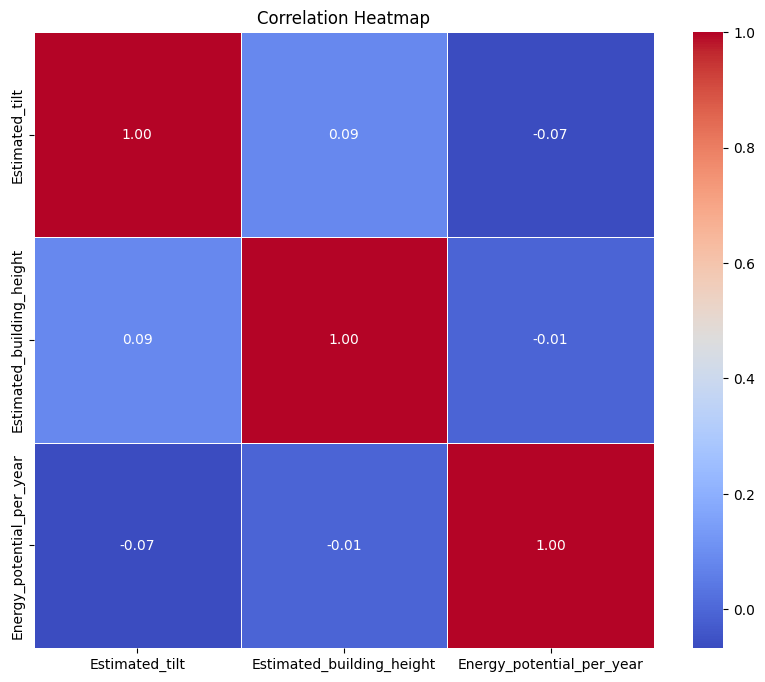

In [187]:
correlation_matrixx = sample[['Estimated_tilt', 'Estimated_building_height', 'Energy_potential_per_year']].corr()
# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrixx, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

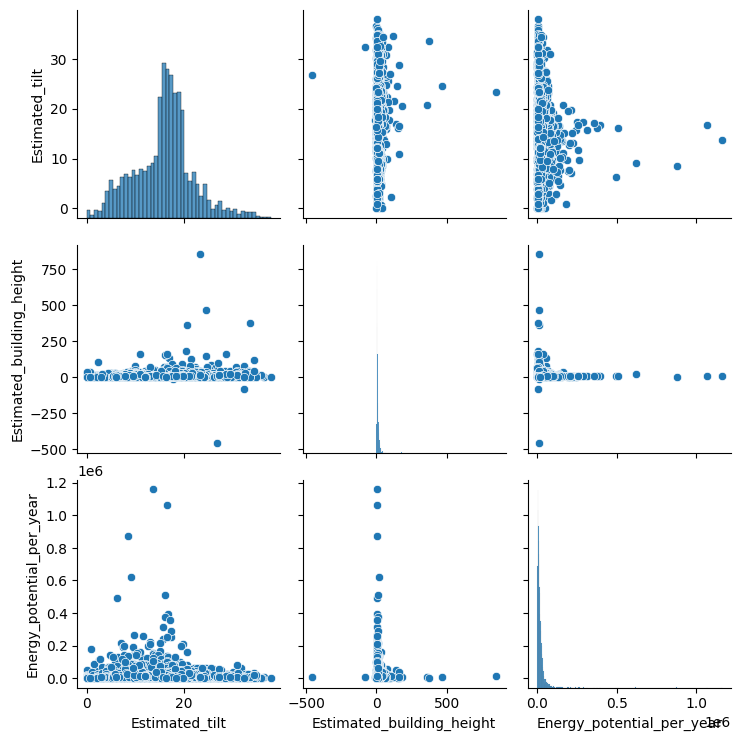

In [188]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(sample[['Estimated_tilt', 'Estimated_building_height', 'Energy_potential_per_year']])
plt.show()


# Research Question 3 

**Can we develop a predictive model to estimate yearly electricity generation based on building features and geographical location?**

In [189]:
##Linear reg for 3rd ques

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from sklearn.metrics import mean_absolute_error


# Define features (independent variables) and target (dependent variable)
X = sample[["Potential_installable_area", "Estimated_tilt", "Estimated_building_height", "Estimated_capacity_factor","no_of_panels"]]
y = sample["Energy_potential_per_year"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate mean squared error as a performance metric
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Calculate R-squared (coefficient of determination)
r2 = r2_score(y_test, y_pred)

# Calculate explained variance score
explained_variance = explained_variance_score(y_test, y_pred)

# Print the metrics
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared (R2):", r2)
print("Explained Variance:", explained_variance)

# Plot the metrics
metrics = {
    "Mean Squared Error": mse,
    "R-squared (R2)": r2,
    "Explained Variance": explained_variance
}

#plt.bar(metrics.keys(), metrics.values())
#plt.title("Linear Regression Metrics")

Mean Squared Error: 2868896.661067658
Mean Absolute Error: 890.8477689770735
R-squared (R2): 0.998066621479973
Explained Variance: 0.9980668461538982


In [190]:
#rfc for q3

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Define features (independent variables) and target variable
X = sample[["Surface_area", "Estimated_tilt", "Estimated_building_height", "Estimated_capacity_factor"]]
y = sample["Energy_potential_per_year"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Random Forest Regressor model
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)

# Calculate mean squared error and R-squared as performance metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the metrics
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared (R2):", r2)


Mean Squared Error: 14499640.208725356
Mean Absolute Error: 1813.6344455747721
R-squared (R2): 0.9902285455910299


In [191]:
#decision tree for q3

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score, confusion_matrix
from sklearn.model_selection import train_test_split

# Define features (independent variables) and target (dependent variable)
X = sample[["Surface_area", "Estimated_tilt", "Estimated_building_height", "Estimated_capacity_factor"]]
y = sample["Energy_potential_per_year"]

# No need to encode 'Assumed_building_type' since it's dropped

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the decision tree regressor
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate mean squared error as a performance metric
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Calculate R-squared (coefficient of determination)
r2 = r2_score(y_test, y_pred)

# Calculate explained variance score
explained_variance = explained_variance_score(y_test, y_pred)

# Print the metrics
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared (R2):", r2)
print("Explained Variance:", explained_variance)

# Since 'Assumed_building_type' is dropped, you don't need to generate a confusion matrix.

# If you have other analysis or visualization needs, you can modify the code accordingly.


Mean Squared Error: 106860438.82899535
Mean Absolute Error: 2690.552716174974
R-squared (R2): 0.9279856678435572
Explained Variance: 0.9280668118509512


In [194]:

# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Load your dataset
# Assuming your dataset is in a DataFrame named 'df'
# If your data is in a CSV file, you can use pd.read_csv('your_file.csv')
# Replace 'your_file.csv' with the actual file path
# Example: df = pd.read_csv('your_file.csv')
# Make sure to replace 'your_file.csv' with the actual file path

# Drop 'uuid' and 'City' columns
#df = df.drop(columns=['uuid', 'City'])

# Drop non-numeric columns
X = sample.drop(columns=['Energy_potential_per_year'])

# Convert categorical variables into numerical representations using one-hot encoding
X = pd.get_dummies(X)

# The target variable
y = sample['Energy_potential_per_year']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Gradient Boosting Regressor
gb_regressor = GradientBoostingRegressor()

# Train the regressor
gb_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gb_regressor.predict(X_test)

# Evaluate the model using mean squared error
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
# Calculate R-squared (coefficient of determination)
r2 = r2_score(y_test, y_pred)


print("R-squared (R2):", r2)
print("Mean Absolute Error: ", mae)
print(f'Mean Squared Error: {mse}')

# Now you can use this trained model to predict the energy potential for new data
# For example, you can use gb_regressor.predict(new_data) where new_data is a DataFrame with the same structure as your training data


R-squared (R2): 0.9643763617345756
Mean Absolute Error:  653.2602762188332
Mean Squared Error: 52861111.16685621


In [193]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load your dataset
# Assuming your dataset is in a DataFrame named 'df'
# If your data is in a CSV file, you can use pd.read_csv('your_file.csv')
# Replace 'your_file.csv' with the actual file path
# Example: df = pd.read_csv('your_file.csv')
# Make sure to replace 'your_file.csv' with the actual file path

# Print the column names to check for their existence#
#print(df.columns)

# Drop non-numeric columns
X = sample.drop(columns=['uuid', 'City'], errors='ignore')  # Add errors='ignore'

# Convert categorical variables into numerical representations using one-hot encoding
X = pd.get_dummies(X)

# The target variable
y = sample['Energy_potential_per_year']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost Regressor
xgb_regressor = XGBRegressor()

# Train the regressor
xgb_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_regressor.predict(X_test)

# Evaluate the model using mean squared error
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Calculate R-squared (coefficient of determination)
r2 = r2_score(y_test, y_pred)

print("R-squared (R2):", r2)
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')

# Now you can use this trained model to predict the energy potential for new data
# For example, you can use xgb_regressor.predict(new_data) where new_data is a DataFrame with the same structure as your training data


R-squared (R2): 0.9776803755713275
Mean Squared Error: 33119585.914717443
Mean Absolute Error: 408.51534750425185
